In [191]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

## Question 1

In [192]:
model = hmm.CategoricalHMM()
model.n_components  = 2     # two states: hot and cold days
model.startprob_    = [ 0.8,0.2 ]
model.transmat_     = [ [0.6,0.4] , [0.5,0.5] ]
model.emissionprob_ = [ [0.2,0.4,0.4] , [0.5,0.4,0.1] ]

In [193]:
_,posteriors = model.score_samples([[2]])
print(posteriors)

_,posteriors = model.score_samples([[2,0]])
print(posteriors)


[[0.94117647 0.05882353]]
[[0.93601463 0.06398537]
 [0.36928702 0.63071298]]


In [194]:
print(model.score([[2,0,2]]))
print(model.decode([[2,0,2]]))

-3.5556781159513955
(-4.358310108056566, array([0, 1, 0]))


## Question 2

In my github at: https://github.com/MiguelAcostaDelVecchio/RandomProcesses/tree/master/Week9

The file name is Step2HW9.pdf

## Question 3

In [195]:
data = np.load("hw_09_data.npy")

# Build an HMM instance and set parameters
gen_model = hmm.GaussianHMM(n_components=4, covariance_type="full").fit(data)

# Generate samples
X, Z = gen_model.sample(500)

/var/folders/q4/sq902pw91nbgxz6d4gj0qbcc0000gn/T/ipykernel_1741/1056194133.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


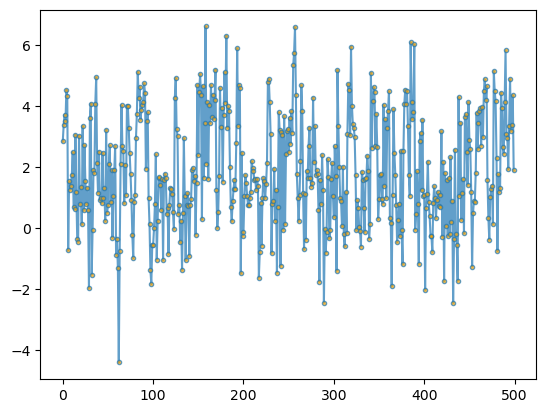

In [196]:
fig, ax = plt.subplots()
ax.plot(X[:, 0], ".-", label="observations", ms=6,
        mfc="orange", alpha=0.7)
fig.show()

In [197]:
scores = list()
models = list()
for n_components in (3, 4, 5):
    for idx in range(10):
        model = hmm.GaussianHMM(n_components=n_components,
                                covariance_type='full',
                                random_state=idx)
        model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
        models.append(model)
        scores.append(model.score(X[X.shape[0] // 2:]))
        print(f'Converged: {model.monitor_.converged}'
              f'\tScore: {scores[-1]}')

model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

states = model.predict(X)

Converged: True	Score: -504.152110752806
Converged: True	Score: -461.3187603312057
Converged: True	Score: -497.94307883807255
Converged: True	Score: -462.85947452010583
Converged: True	Score: -465.634497453434
Converged: True	Score: -466.4599058849583
Converged: True	Score: -460.8030440164373
Converged: True	Score: -463.5945809053215
Converged: True	Score: -460.05775179145104
Converged: True	Score: -465.574537940585
Converged: True	Score: -468.2727668292619
Converged: True	Score: -493.4653840441944
Converged: True	Score: -465.78349877101954
Converged: True	Score: -473.57805421805057
Converged: True	Score: -470.44332328611443
Converged: True	Score: -460.8891043995669
Converged: True	Score: -462.6174761710595
Converged: True	Score: -468.48588832952464
Converged: True	Score: -471.8444194769976
Converged: True	Score: -465.9501944545698
Converged: True	Score: -463.562397564633
Converged: True	Score: -468.0576626316286
Converged: True	Score: -467.53710957193294
Converged: True	Score: -462.79

/var/folders/q4/sq902pw91nbgxz6d4gj0qbcc0000gn/T/ipykernel_1741/2395789986.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/q4/sq902pw91nbgxz6d4gj0qbcc0000gn/T/ipykernel_1741/2395789986.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


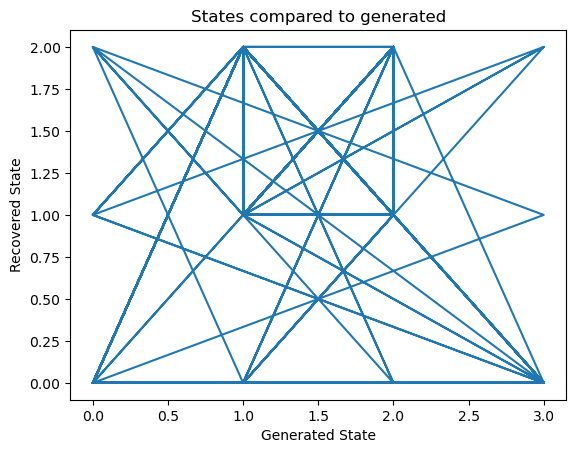

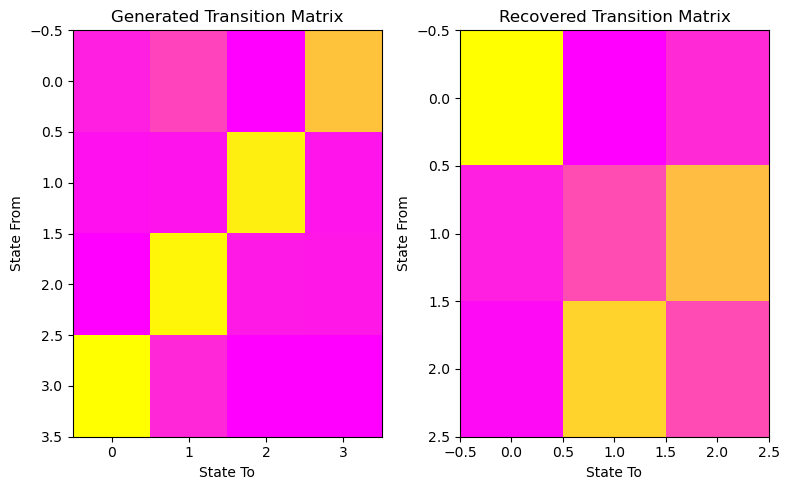

In [198]:
fig, ax = plt.subplots()
ax.plot(Z, states)
ax.set_title('States compared to generated')
ax.set_xlabel('Generated State')
ax.set_ylabel('Recovered State')
fig.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ax1.imshow(gen_model.transmat_, aspect='auto', cmap='spring')
ax1.set_title('Generated Transition Matrix')
ax2.imshow(model.transmat_, aspect='auto', cmap='spring')
ax2.set_title('Recovered Transition Matrix')
for ax in (ax1, ax2):
    ax.set_xlabel('State To')
    ax.set_ylabel('State From')

fig.tight_layout()
fig.show()